# **2. Dose-Response Analysis**

In [5]:
#import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/diabetesalcohol.csv')

/tmp/ipython-input-209587642.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dose_response = df.groupby('alcohol_bin')['type2_diabetes'].mean().reset_index()


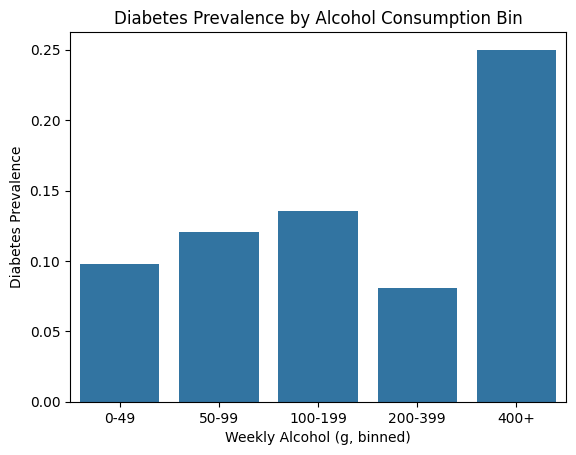

In [10]:
#Bin alcohol for grouped prevalence
df['alcohol_bin'] = pd.cut(df['weekly_alcohol_grams'],
                           bins=[0, 50, 100, 200, 400, 700],
                           right=False,
                           labels=['0-49', '50-99', '100-199', '200-399', '400+'])

dose_response = df.groupby('alcohol_bin')['type2_diabetes'].mean().reset_index()

plt.figure()
sns.barplot(x='alcohol_bin', y='type2_diabetes', data=dose_response)
plt.ylabel('Diabetes Prevalence')
plt.xlabel('Weekly Alcohol (g, binned)')
plt.title('Diabetes Prevalence by Alcohol Consumption Bin')
plt.show()


In [11]:
#Restricted cubic spline model (flexible trend)
import statsmodels.api as sm
from patsy import dmatrix

x_spline = dmatrix("bs(df['weekly_alcohol_grams'], df=4, degree=3, include_intercept=False)",
                   {"df": df}, return_type='dataframe')
y = df['type2_diabetes']
spline_logit = sm.Logit(y, sm.add_constant(x_spline)).fit()
print(spline_logit.summary())

Optimization terminated successfully.
         Current function value: 0.323797
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         type2_diabetes   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14995
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:               0.0003473
Time:                        21:27:47   Log-Likelihood:                -4857.0
converged:                       True   LL-Null:                       -4858.6
Covariance Type:            nonrobust   LLR p-value:                    0.4971
                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------

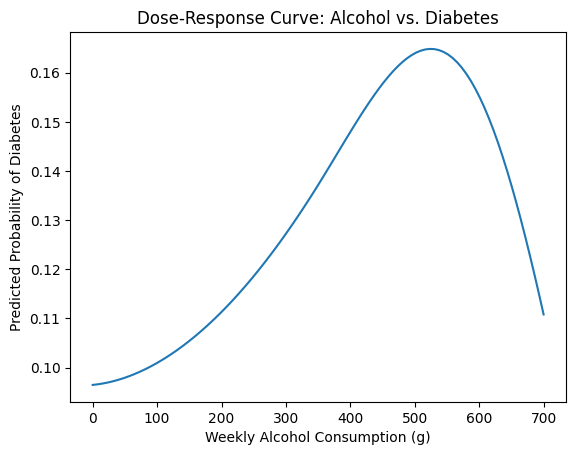

In [13]:
# Create prediction range
import numpy as np
alcohol_range = np.linspace(0, 700, 100)
x_pred = dmatrix("bs(alcohol_range, df=4, degree=3, include_intercept=False)",
                 {"alcohol_range": alcohol_range}, return_type='dataframe')

# Predict
pred_probs = spline_logit.predict(sm.add_constant(x_pred))

# Plot
plt.plot(alcohol_range, pred_probs)
plt.xlabel('Weekly Alcohol Consumption (g)')
plt.ylabel('Predicted Probability of Diabetes')
plt.title('Dose-Response Curve: Alcohol vs. Diabetes')
plt.show()